C:\Users\Swetalina\AppData\Local\Temp\ipykernel_35764\100641255.py:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1  1077430    1314167       2500         2500           2500.0   60 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
1   15.27%        59.83     C        C4  ...          119.66   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   
6   15.96%       170.08     C        C5  ...         1313.76   
7   18.64%       109.43     E        E1  ...          111.34   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
1             Sep-13                        0.0            1     

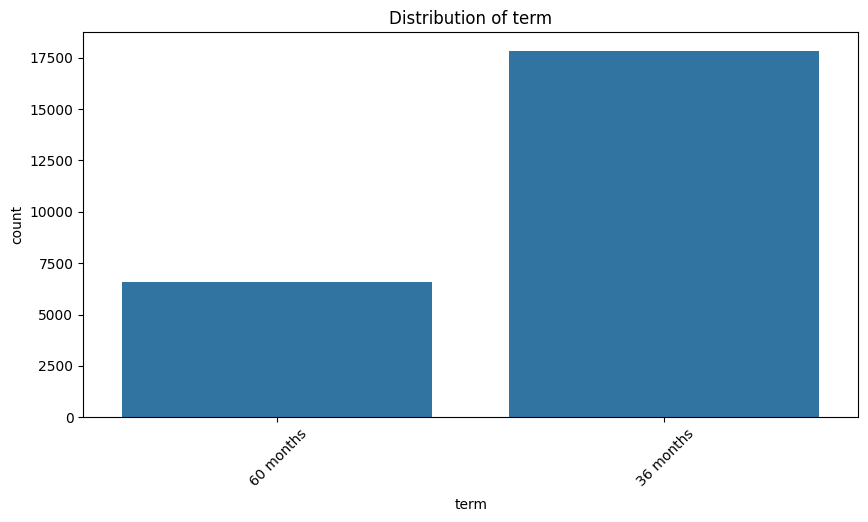

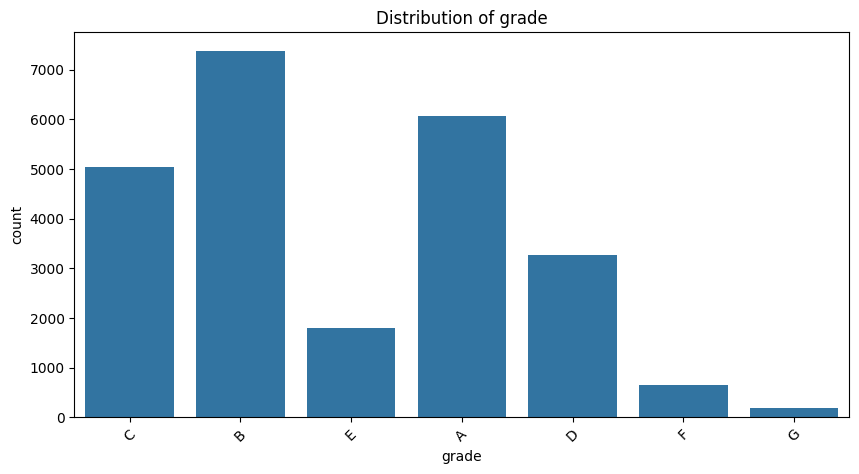

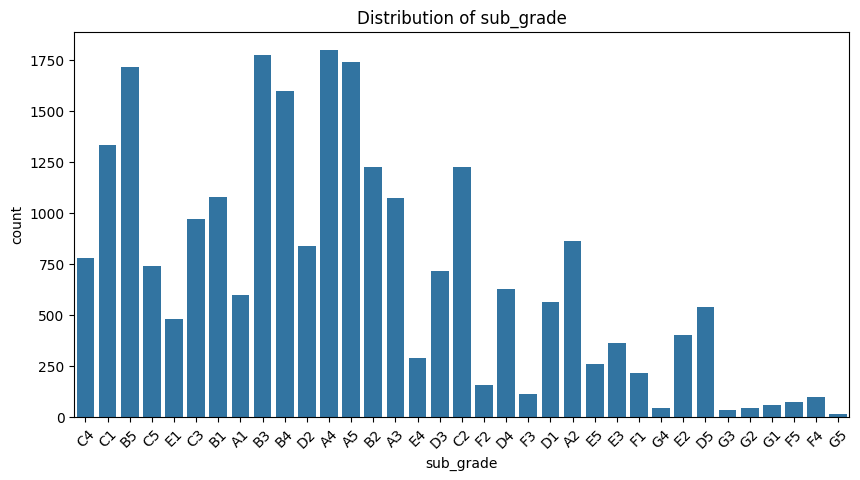

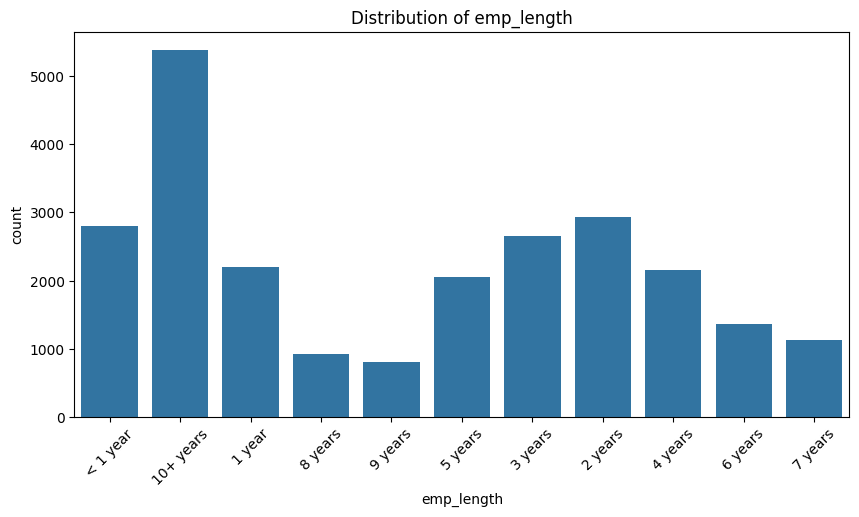

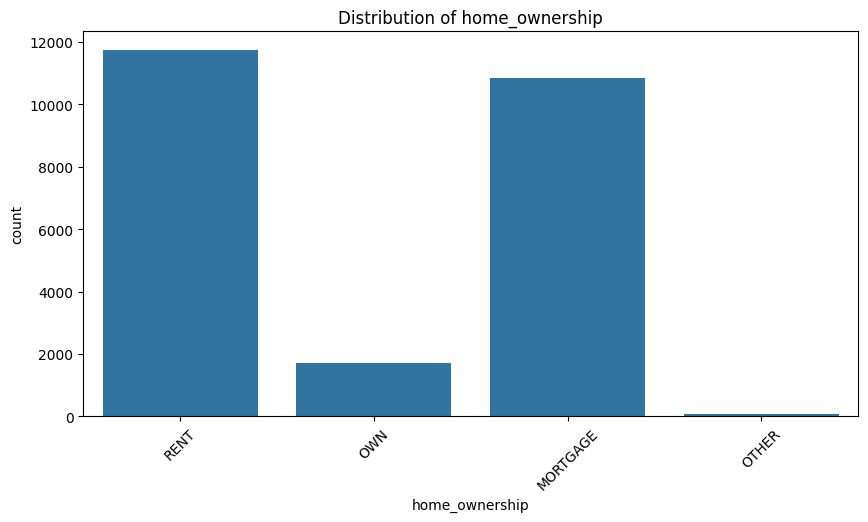

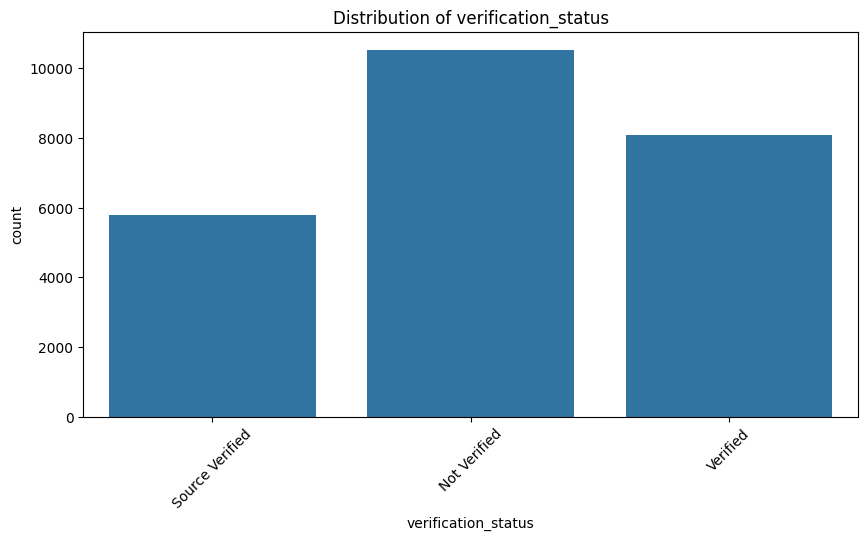

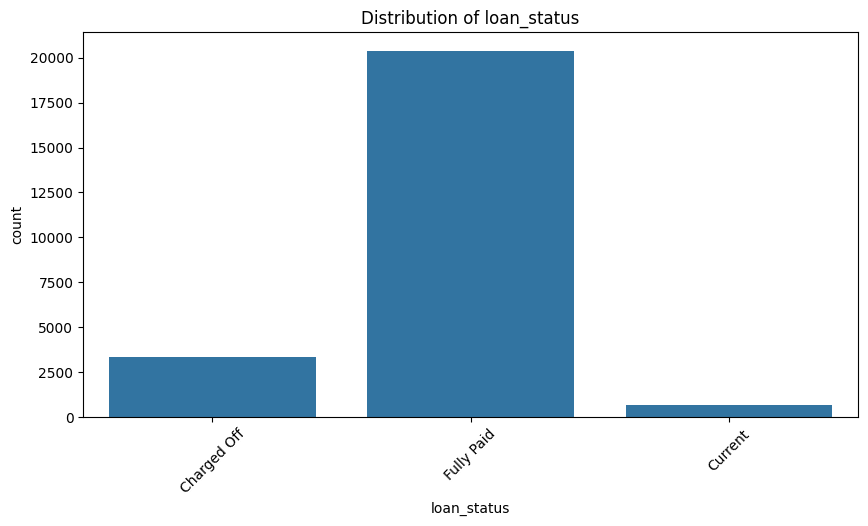

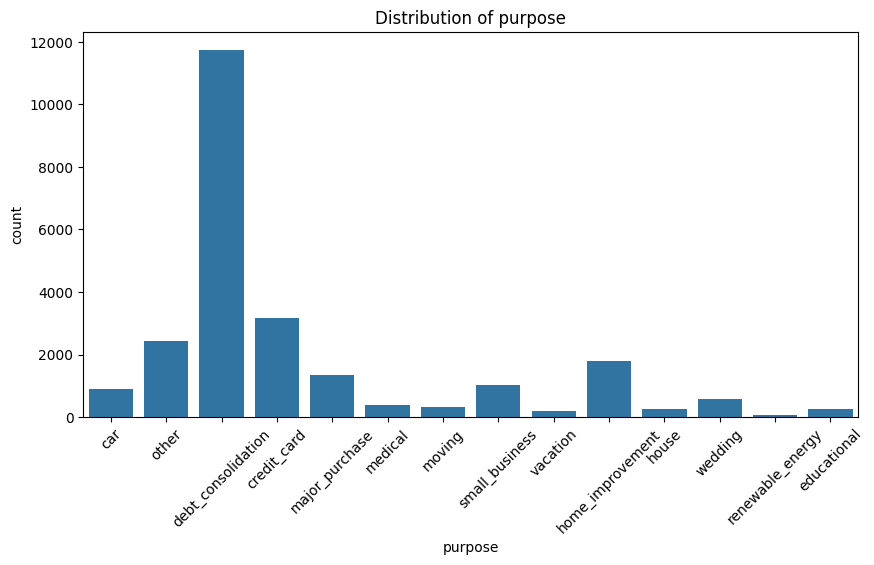

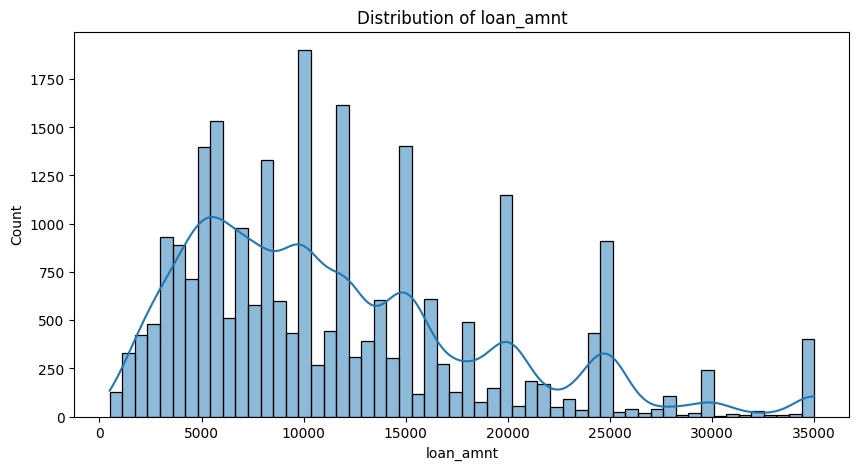

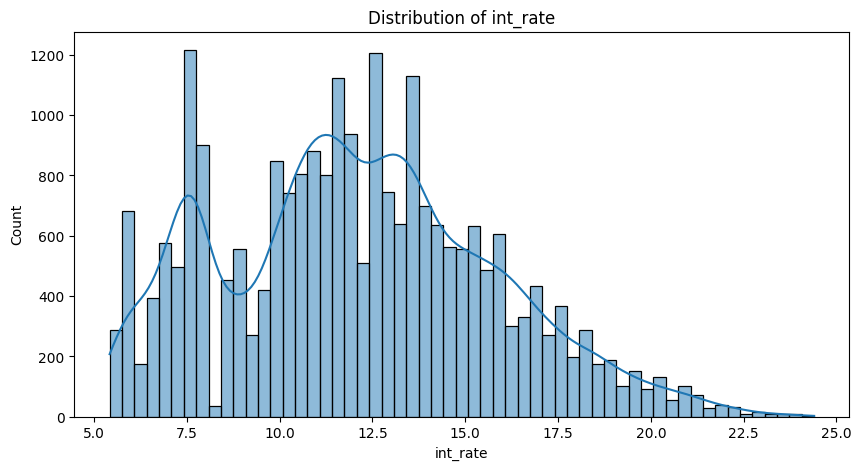

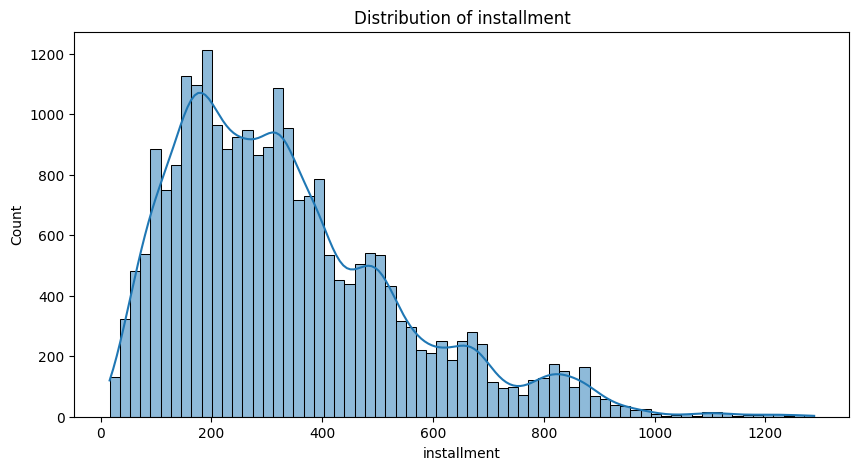

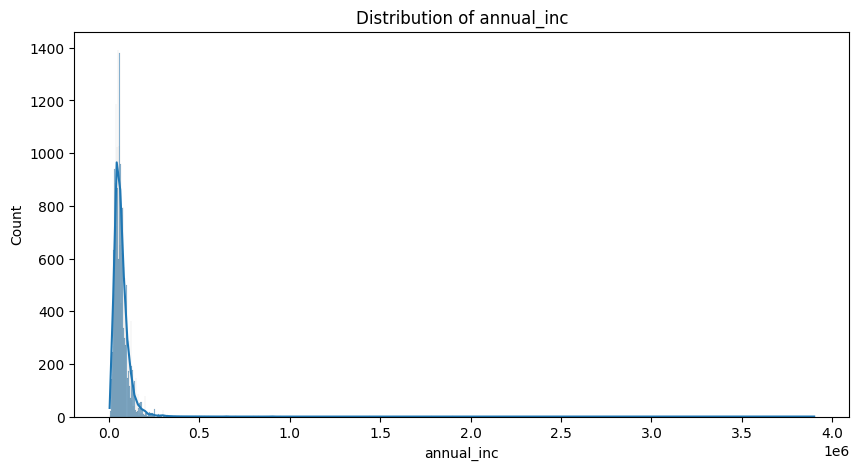

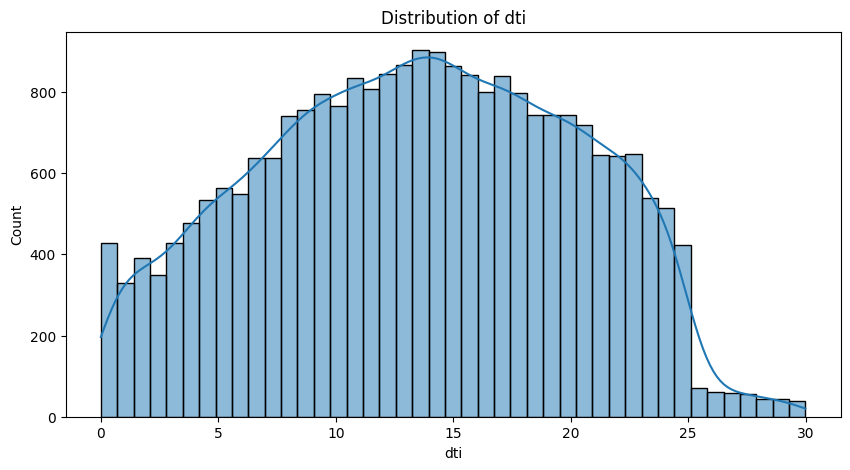

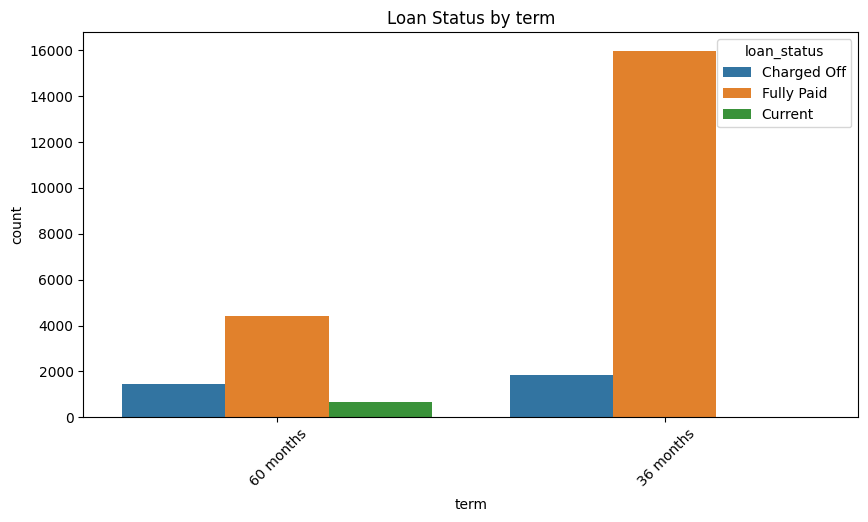

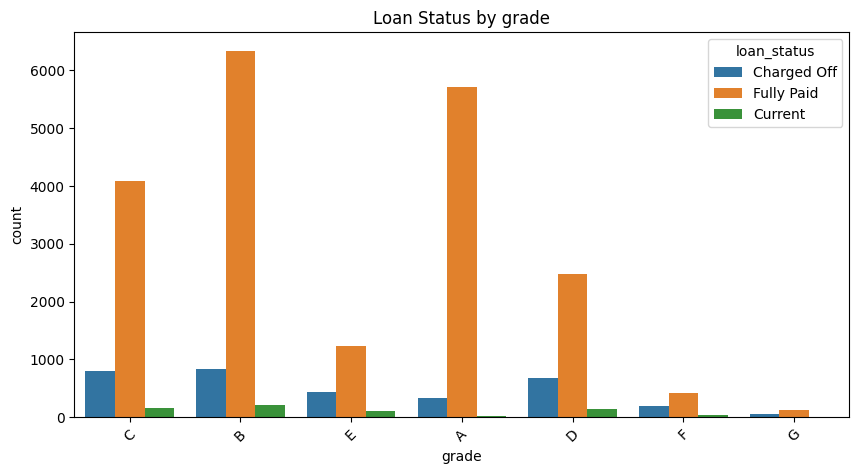

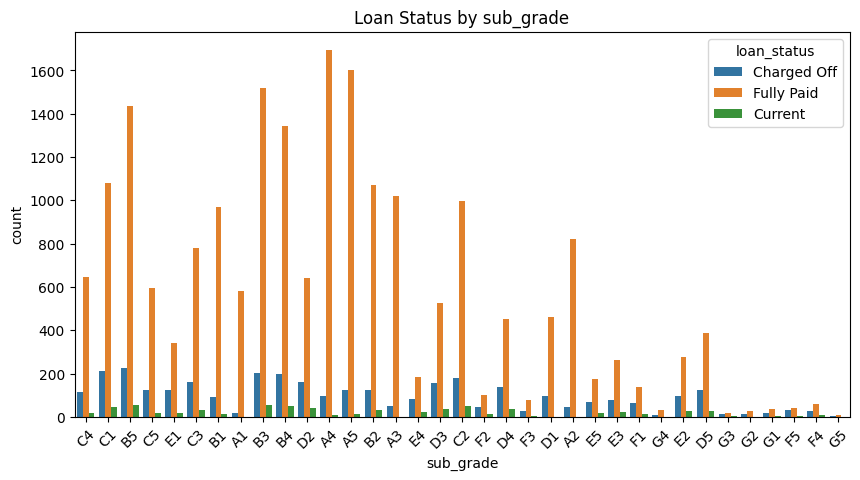

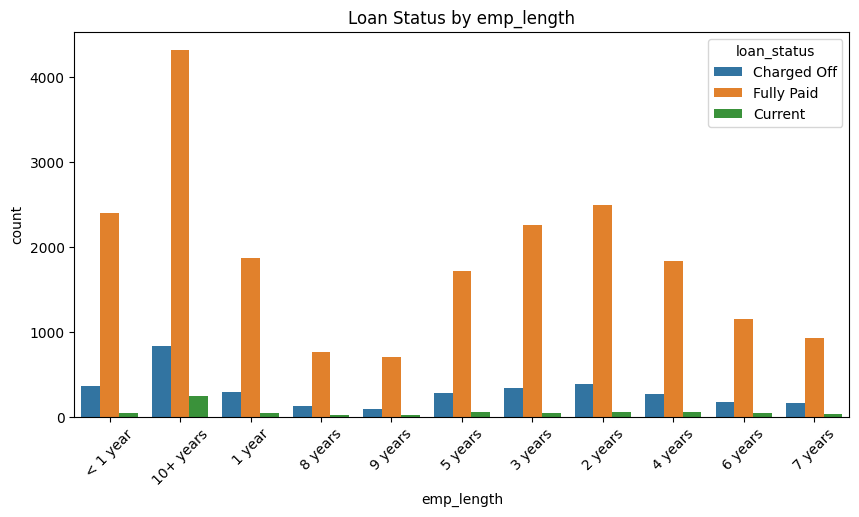

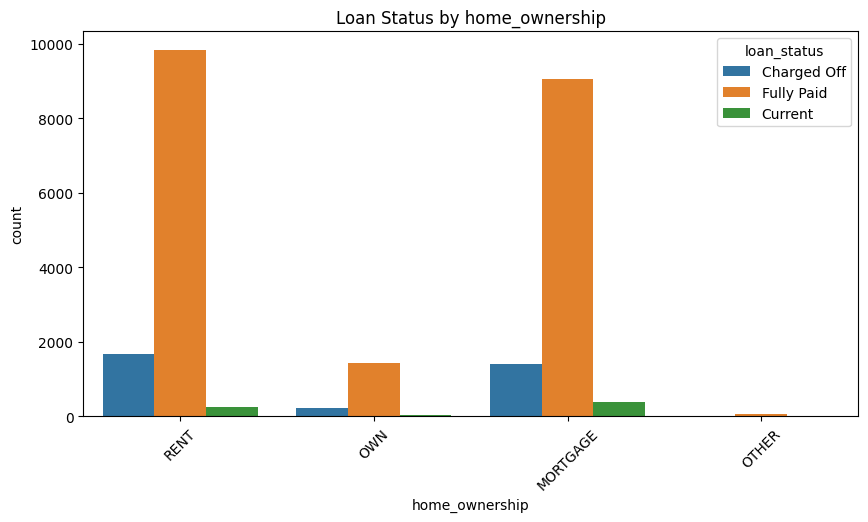

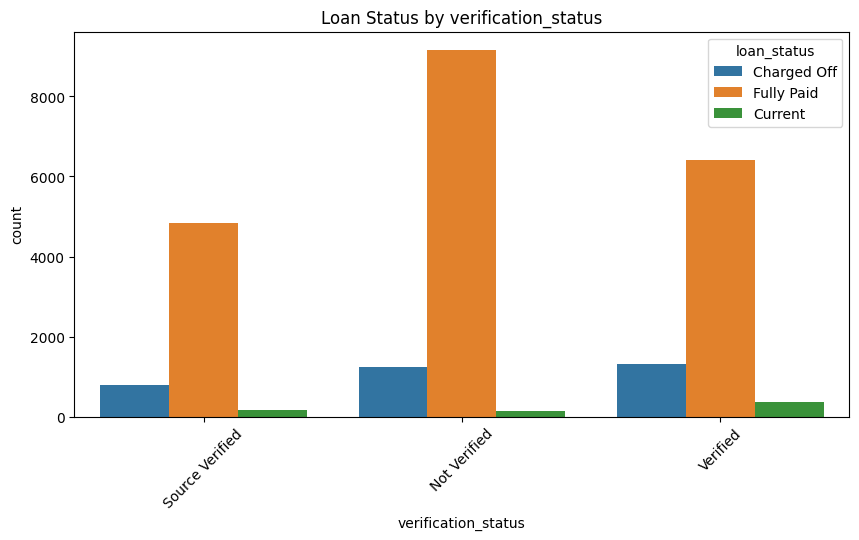

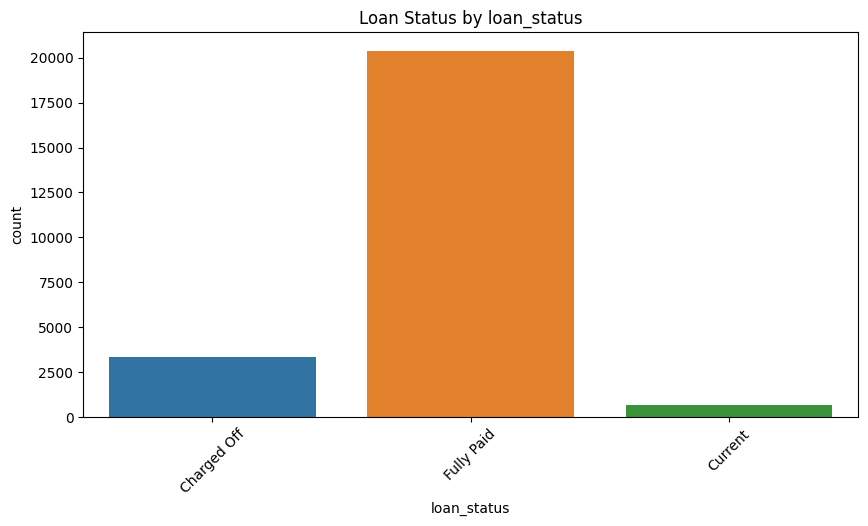

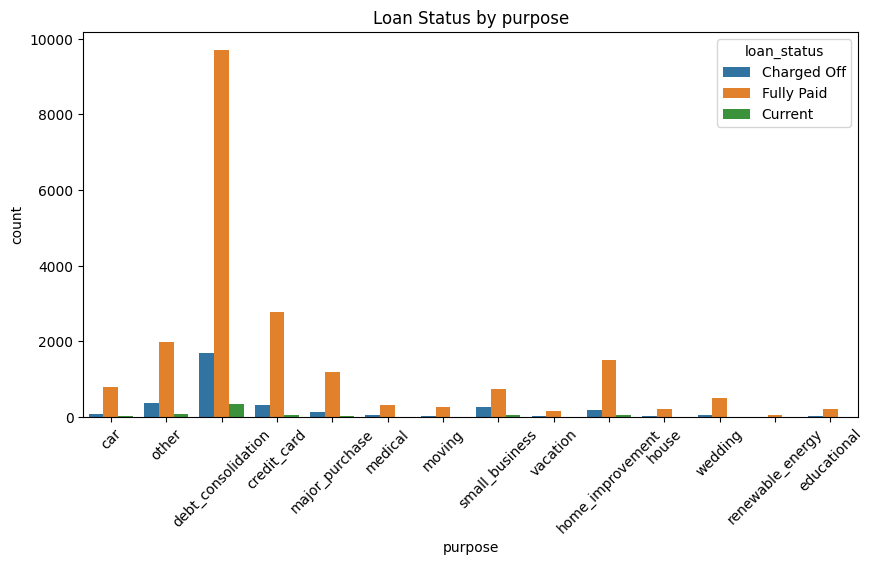

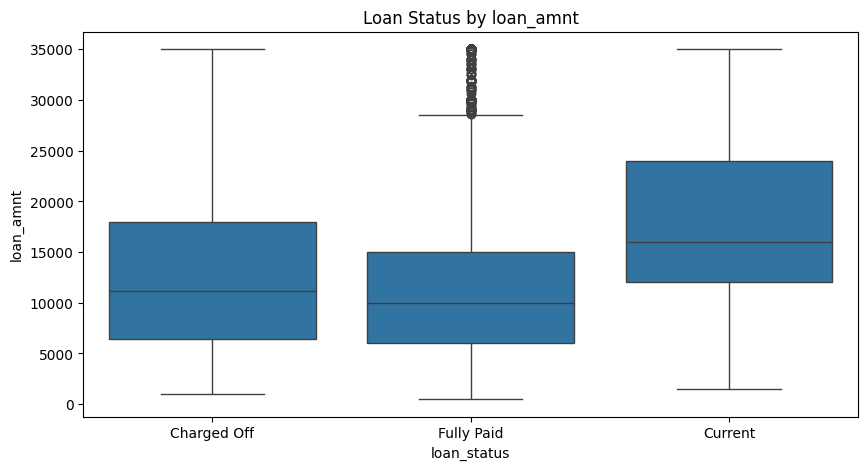

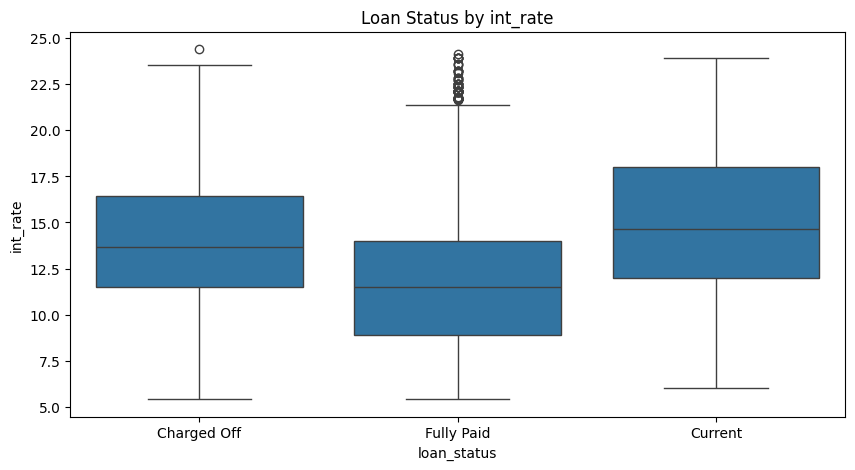

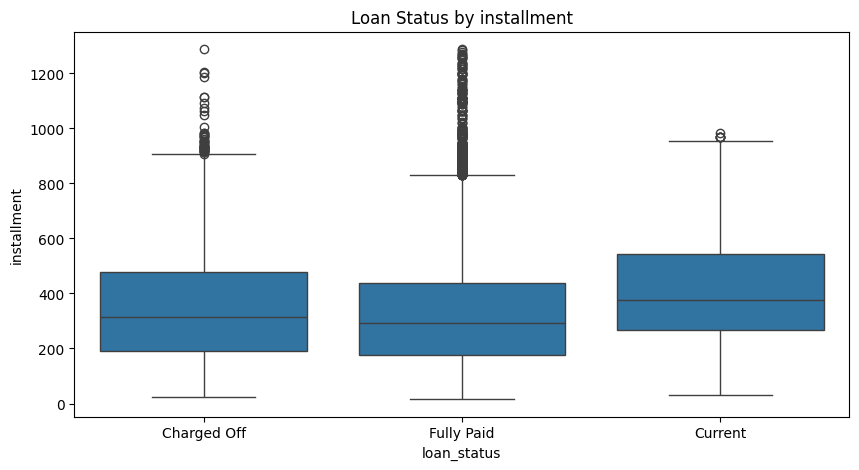

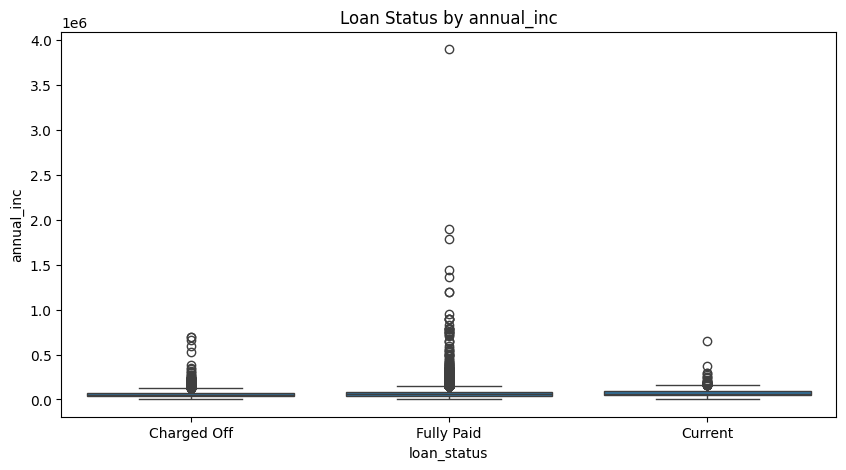

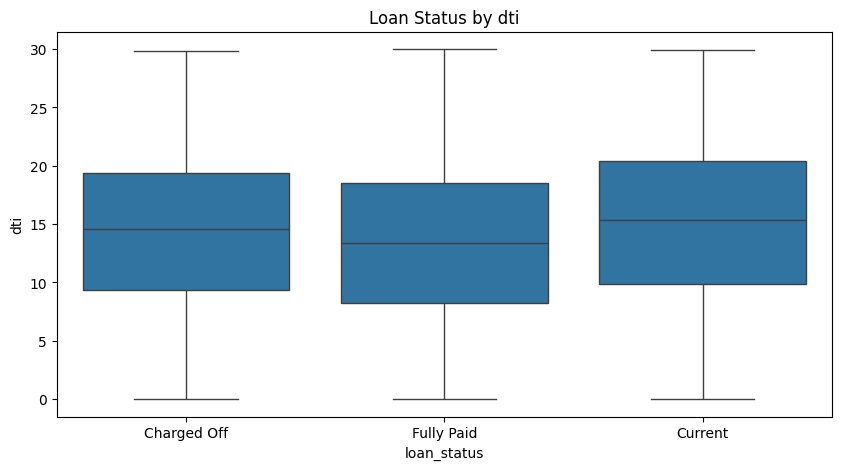

Accuracy: 0.8578160213071092
Confusion Matrix:
[[4187    0]
 [ 694    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4187
           1       0.00      0.00      0.00       694

    accuracy                           0.86      4881
   macro avg       0.43      0.50      0.46      4881
weighted avg       0.74      0.86      0.79      4881



C:\Users\Swetalina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Swetalina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Swetalina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

# Load the dataset
file_path = 'loan.csv'  # Change this to the path of your CSV file
loan_data = pd.read_csv(file_path)

# Data Cleaning: Handling missing values
loan_data = loan_data.dropna(thresh=len(loan_data) * 0.5, axis=1)  # Drop columns with more than 50% missing values
loan_data = loan_data.dropna()  # Drop rows with any missing values for simplicity

# Display the first few rows of the dataset
print(loan_data.head())

# Data cleaning: Remove percentage sign from 'int_rate' and convert to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)

# Univariate analysis for categorical variables
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=loan_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate analysis for numerical variables
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(loan_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bivariate analysis between loan status and categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=loan_data, x=column, hue='loan_status')
    plt.title(f'Loan Status by {column}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate analysis between loan status and numerical variables
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=loan_data, x='loan_status', y=column)
    plt.title(f'Loan Status by {column}')
    plt.show()

# Encode categorical variables directly on loan_data
le = LabelEncoder()
loan_data['term'] = le.fit_transform(loan_data['term'])
loan_data['grade'] = le.fit_transform(loan_data['grade'])
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)  # Binary encoding

# Select features and target variable
features = ['loan_amnt', 'int_rate', 'term', 'grade']
X = loan_data[features]
y = loan_data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
